Prepare Data for Clustering:
python
Copy
Edit


In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import pandas as pd

customer_profiles = pd.DataFrame({
    "total_transactions": [10, 5, 2, 15, 8],
    "total_quantity": [20, 10, 5, 30, 15],
    "total_spent": [100, 50, 20, 150, 80]
})

scaler = StandardScaler()

features = scaler.fit_transform(customer_profiles[["total_transactions", "total_quantity", "total_spent"]])

customer_profiles.fillna(0, inplace=True)
features = scaler.fit_transform(customer_profiles[["total_transactions", "total_quantity", "total_spent"]])

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(features)

customer_profiles["Cluster"] = clusters

db_index = davies_bouldin_score(features, clusters)
print(f"Davies-Bouldin Index: {db_index}")

Davies-Bouldin Index: 0.2249645122598889


Visualize Clusters:



> Add blockquote



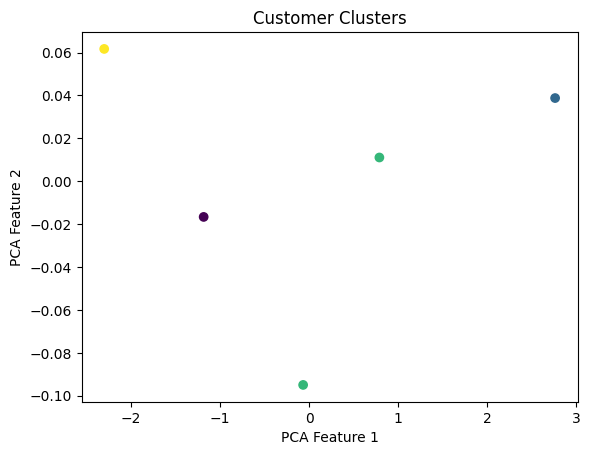

In [6]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

data_for_clustering = features

pca = PCA(n_components=2)
reduced_features = pca.fit_transform(data_for_clustering)

plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=clusters, cmap='viridis')
plt.title('Customer Clusters')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.show()

Save Results

In [7]:
customer_profiles.to_csv("Customer_Clusters.csv", index=False)
